## One Way ANOVAs in Python - NOTES

In [14]:
# Import Packages
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [4]:
apps = pd.read_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\105 Intermediate Statistics\Lesson 4 - ANOVAs\NEWgoogleplaystore.csv')

## Question Set Up
Is there a difference in the number of reviews among the three app categories of beauty, food and drink, and photography?

## Data Wrangling:
Focusing on 3 categories

In [25]:
categories = ['BEAUTY', 'FOOD_AND_DRINK','PHOTOGRAPHY']
apps1 = apps['Category'].isin(categories)
apps2 = apps[apps1].copy()
apps2.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
98,99,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17M,"500,000+",Free,0,Everyone,Beauty,2-Aug-18,6.10.1,5.0 and up
99,100,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,9-Nov-17,2.3.0,4.1 and up
100,101,Natural recipes for your beauty,BEAUTY,4.7,1150,9.8M,"100,000+",Free,0,Everyone,Beauty,15-May-18,4,4.1 and up
101,102,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739,21M,"500,000+",Free,0,Everyone,Beauty,12-Jul-18,1.0.6,4.0.3 and up
102,103,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090,Varies with device,"1,000,000+",Free,0,Everyone,Beauty,24-Oct-16,Varies with device,Varies with device


## Subsetting only the needed variables

In [6]:
apps3 = apps2[['Category','Reviews']]

## Changing Reviews to an Integer

In [7]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


In [8]:
apps3.Reviews = apps3.Reviews.astype(int)

C:\Users\nikki\AppData\Local\Temp\ipykernel_2640\1171526474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps3.Reviews = apps3.Reviews.astype(int)


## Recoding category to a number

In [10]:
def recode (series):
    if series == "BEAUTY": 
        return 0
    if series == "FOOD_AND_DRINK": 
        return 1
    if series == "PHOTOGRAPHY": 
        return 2

apps3['CategoryR'] = apps3['Category'].apply(recode)

C:\Users\nikki\AppData\Local\Temp\ipykernel_2640\1837445721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps3['CategoryR'] = apps3['Category'].apply(recode)


## Dropping the original category value

In [11]:
apps4 = apps3[['CategoryR','Reviews']]

## Test Assumptions


### Normality

sns.distplot(apps4['Reviews'])

In [16]:
apps4['ReviewsSQRT'] = np.sqrt(apps4['Reviews'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ReviewsSQRT', ylabel='Density'>

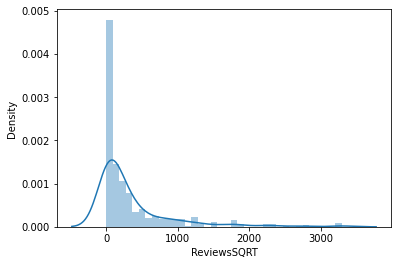

In [18]:
sns.distplot(apps4['ReviewsSQRT'])

# Homogeneity of Variance

### Bartlett's Test

In [19]:
scipy.stats.bartlett(apps4['ReviewsSQRT'], apps4['CategoryR'])

BartlettResult(statistic=6187.981817647615, pvalue=0.0)

### Fligner's Test

In [21]:
scipy.stats.fligner(apps4['ReviewsSQRT'], apps4['CategoryR'])


FlignerResult(statistic=642.0602581715318, pvalue=1.1908711834100128e-141)

# Computing ANOVAs with Equal Variance

In [22]:
stats.f_oneway(apps['Reviews'][apps['Category']=='BEAUTY'],
                    apps['Reviews'][apps['Category']=='FOOD_AND_DRINK'],
                    apps['Reviews'][apps['Category']=='PHOTOGRAPHY'])

F_onewayResult(statistic=11.467490725511773, pvalue=1.342932747373518e-05)

###  Since the p value is less than .05, there is a significant difference in Reviews between these three categories.

# Computing ANOVAs with Unequal Variance

In [23]:
postHoc = MultiComparison(apps4['ReviewsSQRT'], apps4['CategoryR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   111.89 0.4062 -93.3095 317.0896  False
     0      2  419.474    0.0 233.9776 604.9704   True
     1      2  307.584    0.0 176.8235 438.3446   True
------------------------------------------------------


## Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance
There is NO WAY to compute post hocs with unequal variance in Python! Either switch over to R or be VERY CAUTIOUS when interpreting your results and don't use for anything high stakes!

### Determine Means and Draw Conclusions

In [24]:
apps4.groupby('CategoryR').mean()

,Reviews,ReviewsSQRT
CategoryR,,
0,7476.226415,48.854024
1,69947.480315,160.744038
2,637363.134328,468.328067


In [9]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 10.1+ KB
